<a href="https://colab.research.google.com/github/ppojawa/neural-network-course/blob/master/03_keras/06_save_load_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Zapisywanie i ładowanie wag z modelu

Celem tego notebook'a jest nauczenie się pracy z obsługą modeli, m.in.:
 - zapisanie wag po każdej epoce
 - zapisanie wag po określonej liczbie epok
 - załadowanie wag
 - zapisanie całego modelu
 - załadowanie całego modelu

### Spis treści:
1. [Import bibliotek](#a0)
2. [Załadowanie danych i wstępna eksploracja](#a1)
3. [Budowa modelu](#a2)
4. [Zapisywanie punktów kontrolnych podczas trenowania](#a3)
5. [Załadowanie wag do modelu](#a4)
6. [Dodatkowe opcje](#a5)
7. [Ręczne zapisywanie wag](#a6)
8. [Zapisanie całego modelu](#a7)




### <a name='a0'> </a> 1. Import bibliotek

In [ ]:
# Przygotowanie środowiska do pracy z Tensorflow 2.0.
# Jeśli otrzymasz błąd podczas instalacji Tensorflow uruchom tę komórkę raz jeszcze.

# !pip uninstall -y tensorflow
# !pip install -q tensorflow==2.0.0

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

sns.set()
tf.__version__

'2.15.0'

### <a name='a1'> </a> 2. Załadowanie danych i wstępna eksploracja

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

(-0.5, 27.5, 27.5, -0.5)

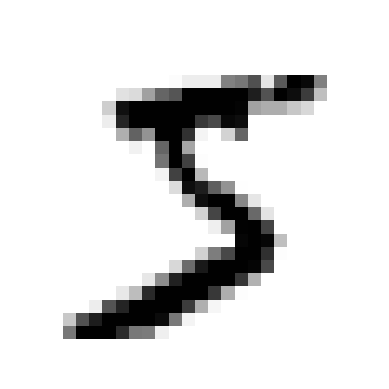

In [5]:
plt.imshow(train_images[0], cmap='gray_r')
plt.grid(False)
plt.axis(False)

In [6]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

### <a name='a2'> </a> 3. Budowa modelu

In [8]:
def create_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### <a name='a3'> </a> 4. Zapisywanie punktów kontrolnych podczas trenowania

In [9]:
checkpoint_path = 'training/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint

cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              save_weights_only=True,
                              verbose=1)

model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), callbacks=[cp_callback])

Epoch 1/10
32/32 [==============================] - ETA: 0s - loss: 1.1653 - accuracy: 0.6750
Epoch 1: saving model to training/cp.ckpt
32/32 [==============================] - 1s 21ms/step - loss: 1.1653 - accuracy: 0.6750 - val_loss: 0.7408 - val_accuracy: 0.7640
Epoch 2/10
26/32 [=======================>......] - ETA: 0s - loss: 0.4154 - accuracy: 0.8810
Epoch 2: saving model to training/cp.ckpt
32/32 [==============================] - 0s 13ms/step - loss: 0.4185 - accuracy: 0.8790 - val_loss: 0.5332 - val_accuracy: 0.8350
Epoch 3/10
32/32 [==============================] - ETA: 0s - loss: 0.2859 - accuracy: 0.9320
Epoch 3: saving model to training/cp.ckpt
32/32 [==============================] - 0s 11ms/step - loss: 0.2859 - accuracy: 0.9320 - val_loss: 0.4766 - val_accuracy: 0.8470
Epoch 4/10
28/32 [=========================>....] - ETA: 0s - loss: 0.2052 - accuracy: 0.9520
Epoch 4: saving model to training/cp.ckpt
32/32 [==============================] - 0s 12ms/step - loss: 0.20

In [11]:
ls -l {checkpoint_dir}

total 4780
-rw-r--r-- 1 root root      71 Jan  2 14:15 checkpoint
-rw-r--r-- 1 root root 4886436 Jan  2 14:15 cp.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root     978 Jan  2 14:15 cp.ckpt.index


### <a name='a4'> </a> 5. Załadowanie wag do modelu

In [12]:
model = create_model()

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print(acc)

32/32 - 0s - loss: 2.3261 - accuracy: 0.1140 - 290ms/epoch - 9ms/step
0.11400000005960464


In [13]:
model.load_weights(checkpoint_path)

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print(acc)

32/32 - 0s - loss: 0.4258 - accuracy: 0.8640 - 94ms/epoch - 3ms/step
0.8640000224113464


### <a name='a5'> </a> 6. Dodatkowe opcje

In [21]:
!rm -rf ./training

In [22]:
checkpoint_path = 'training/cp-{epoch:04d}.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              save_weights_only=True,
                              period=5,
                              verbose=1)

model = create_model()
model.save_weights(checkpoint_path.format(epoch=0))

model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), callbacks=[cp_callback], verbose=0)


Epoch 5: saving model to training/cp-0005.ckpt

Epoch 10: saving model to training/cp-0010.ckpt

Epoch 15: saving model to training/cp-0015.ckpt

Epoch 20: saving model to training/cp-0020.ckpt

Epoch 25: saving model to training/cp-0025.ckpt

Epoch 30: saving model to training/cp-0030.ckpt

Epoch 35: saving model to training/cp-0035.ckpt

Epoch 40: saving model to training/cp-0040.ckpt

Epoch 45: saving model to training/cp-0045.ckpt

Epoch 50: saving model to training/cp-0050.ckpt


In [23]:
!ls -l ./training

total 49360
-rw-r--r-- 1 root root      81 Jan  2 14:22 checkpoint
-rw-r--r-- 1 root root 1629023 Jan  2 14:22 cp-0000.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root     526 Jan  2 14:22 cp-0000.ckpt.index
-rw-r--r-- 1 root root 4886448 Jan  2 14:22 cp-0005.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root     978 Jan  2 14:22 cp-0005.ckpt.index
-rw-r--r-- 1 root root 4886448 Jan  2 14:22 cp-0010.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root     978 Jan  2 14:22 cp-0010.ckpt.index
-rw-r--r-- 1 root root 4886448 Jan  2 14:22 cp-0015.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root     978 Jan  2 14:22 cp-0015.ckpt.index
-rw-r--r-- 1 root root 4886448 Jan  2 14:22 cp-0020.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root     978 Jan  2 14:22 cp-0020.ckpt.index
-rw-r--r-- 1 root root 4886448 Jan  2 14:22 cp-0025.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root     978 Jan  2 14:22 cp-0025.ckpt.index
-rw-r--r-- 1 root root 4886448 Jan  2 14:22 cp-0030.ckpt.data-00000-of-00001
-rw-r--r-- 1 roo

In [24]:
import tensorflow as tf

latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training/cp-0050.ckpt'

In [25]:
model = create_model()
model.load_weights(latest)

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print(acc)

32/32 - 0s - loss: 0.4869 - accuracy: 0.8760 - 391ms/epoch - 12ms/step
0.8759999871253967


### <a name='a6'> </a> 7. Ręczne zapisywanie wag

In [26]:
model.save_weights('./checkpoints/my_checkpoint')

model = create_model()

model.load_weights('./checkpoints/my_checkpoint')

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print(acc)

32/32 - 0s - loss: 0.4869 - accuracy: 0.8760 - 266ms/epoch - 8ms/step
0.8759999871253967


In [27]:
!ls -l checkpoints/

total 1600
-rw-r--r-- 1 root root      83 Jan  2 14:23 checkpoint
-rw-r--r-- 1 root root 1629051 Jan  2 14:23 my_checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root     526 Jan  2 14:23 my_checkpoint.index


### <a name='a7'> </a> 8. Zapisanie całego modelu

In [29]:
model = create_model()
model.fit(train_images, train_labels, epochs=5)
model.save('my_model.h5')
model.save('my_model.keras')

Epoch 1/5
32/32 [==============================] - 1s 6ms/step - loss: 1.1748 - accuracy: 0.6740
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 0.4277 - accuracy: 0.8700
Epoch 3/5
32/32 [==============================] - 0s 6ms/step - loss: 0.2973 - accuracy: 0.9210
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 0.2191 - accuracy: 0.9400
Epoch 5/5
32/32 [==============================] - 0s 6ms/step - loss: 0.1559 - accuracy: 0.9640


In [30]:
from tensorflow.keras.models import load_model

new_model = load_model('my_model.keras')
new_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print(acc)

32/32 - 0s - loss: 0.4198 - accuracy: 0.8560 - 418ms/epoch - 13ms/step
0.8560000061988831
